# **IEEE SSCS “PICO” Proposal**
# **12-BIT PIPELINE ANALOG TO DIGITAL CONVERTER (ADC)**

# **Members**
```markdown
GROUP MEMBERS             EMAIL              |DEGREE PROGRAM AND INSTITUTION  
-------------------------|-------------------|-------------------------------------------------------------------------------------------
NUMAN IJAZ(GROUP LEAD)   | i229936@nu.edu.pk | Masters in IC Design from (NUCES National University of Computer And Emerging Sciences)              
AMBER KHAN               | i229922@nu.edu.pk | Masters in IC Design from (NUCES National University of Computer And Emerging Sciences)              
KASHIF BULAND            | i229920@u.edu.pk  | Masters in IC Design from (NUCES National University of Computer And Emerging Sciences)             
TAHREEM AMJAD            | i229925@nu.edu.pk | Masters in IC Design from (NUCES National University of Computer And Emerging Sciences)             
`````

# **Supervisors**
```markdown
Name                     | EMAIL                   |INSTITUTION 
-------------------------|-------------------------|--------------------------------------------------------------
Dr. Rashad Ramzan        | rashad.ramzan@nu.edu.pk | NUCES National University of Computer And Emerging Sciences 
Dr. Hassan Saif          | hassan.saif@nu.edu.pk   | NUCES National University of Computer And Emerging Sciences          
Engr. Hamza Atiq         | hmz1075@gmail.com       | NUCES National University of Computer And Emerging Sciences 
````

# **1.	Abstract**
A low power, area efficient, and fast response 12-bit resolution Analog to Digital Converter (ADC) is proposed here. The sampling rate of 12-bit 75MS/s is targeted for the proposed ADC, for which pipeline architeture is the feasible choice. The proposed design consists of a 12 pipelined stages of each 1.5 bit resolution. The ADC uses a pseudo-differential architecture and a capacitor cross-coupled sample-and-hold stage. The pipeline ADC is implemented in 130nm CMOS technology. The targeted specificaions include signal-to-noise and distortion ratio of 74.5-dB , spurious free dynamic range 88.5-dB, and 10.7 effective number of bits. The maximum differential and integral nonlinearity are 0.35 and 0.5 LSB, respectively. We have implemented a single stage of 1.5 bit on the open-source tools. The next step is to extend this to 12 bit pipeline archiecture on open source tool.


# **2.	Motivation**
Analog-to-digital converters are the backbone of modern digital systems and thus the design of more compact and low-power converters become an area of interest for researchers. ADC can be roughly divided into three categories: low-to-medium speed, medium-speed, and high-speed converters which include SAR ADC, Flash ADC, Pipeline, and Sigma-Delta ADC. [1] Keeping in view, the refrence of Analog Discovery 2, We have selected pipeline ADC which belongs to the category of high-speed ADC. The pipelined analog-to-digital converter (ADC) has become the most popular ADC architecture for sampling rates from a few mega samples per second (Msps) up to 100Msps+. [2]
####**2.1.	ADC Architecture Choice**
The SAR ADC compares the analog input with a DAC, whose output is updated by previously decided bits and successively approximates the analog input. This serial nature of SAR limits its operating speed to no more than a few Msps and is still slower for very high resolutions (14 to 16 bits). A pipelined ADC, however, employs a parallel structure in which each stage works on 1 to a few bits (of successive samples) concurrently. [3]

In a flash ADC, the number of comparators increases by a factor of 2 for every extra bit of resolution simultaneously, each comparator must be twice as accurate. In a pipeline, however, to first order, the complexity only increases linearly, not exponentially, with the resolution. [4]

Sigma-delta converters trade speed for resolution. Traditionally, oversampling/sigma-delta-type converters commonly used in digital audio have a limited bandwidth of about 22kHz. The need to sample many times to produce one final sample causes the internal analog components in the sigma-delta modulator to operate much faster than the final data rate. [5]

The pipelined ADC is the architecture of choice for sampling rates from a few Msps up to 100Msps+. Design complexity increases only linearly (not exponentially) with the number of bits, thus providing converters with high speed, high resolution, and low power at the same time. Pipelined ADCs are very useful for a wide range of applications, most notably in digital communication where a converter's dynamic performance is often more important than traditional DC specifications like differential nonlinearity (DNL) and integral nonlinearity (INL). 


# **3.	ADC Targeted Specifications** 

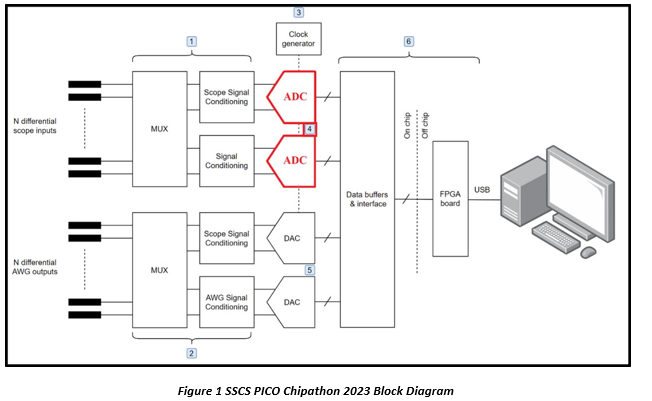

ADC with the following requirements is needed to design.

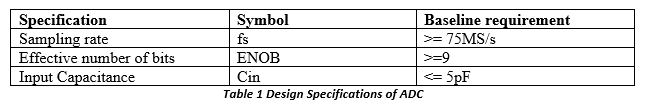



# **4.	Proposed Solution**
Keeping in mind the given specification and reference of Analog Discovery 2, A 12-bit pipeline ADC with 1.5 bits in each stage is designed to meet the requirements. The pipeline approach provides an optimum balance of size, speed, resolution, power dissipation, and analog design effort. A 1.5-bit is a wise approach to cancel out the effect of offset. Single stage 1.5-bit consists of two comparators that compare the analog input to the comparator thresholds. The ADC then gives a digital output corresponding to the region in which the analog input falls. 

####**Block Diagram**
**4.1.	Single Stage 1.5 Bits Architecture**

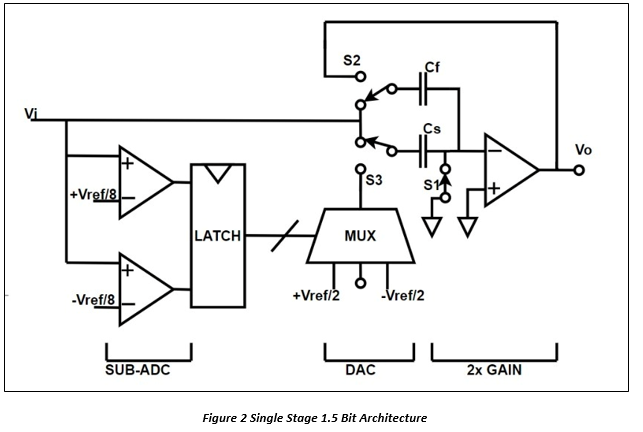

In 1 bit per stage architecture, only 1 comparator is used, each stage accepts input from its previous stage, compares its reference, and uses MDAC to form a residue voltage but here comparator offset introduces error. In 1 bit per stage architecture, there is no compensation technique for canceling the offset.  

While in 1.5 bit per stage architecture as shown in Figure 2 [7]. comparator offset in all 1.5 bit per stage canceled by subsequent stages as long as error < ± Vref/4. 

Firstly, input voltage is given to the comparator then the comparator compares the input voltage with Vref/8 and -Vref/8 and two bits will be generated. If Vi is greater than Vref/8 then the 10 bits will be generated. If Vi<-Vref/8 then 00 bits will be generated and if input voltage lies between ±Vref/8 then 01 bits will be generated.

$ Vi+1= 2*[Vi + \frac{Vref}{4}] $ if $(Vi<-\frac{Vref}{8}) (bi1 , bi0=00)$ ----->(1)

$ Vi+1= 2*Vi $ if $(-\frac{Vref}{8} <Vi<\frac{Vref}{8}) (bi1 , bi0=01)$ ----->(2)

$ Vi+1= 2*[Vi - \frac{Vref}{4}] $ if $(Vi>\frac{Vref}{8}) (bi1 , bi0=10)$ ----->(3)

In this architecture, we used a decoder that will map the 11 bits to 10. Through this structured number of digital bits which will be generated by the comparator, these bits will be fed to the decoder. It will map 00 to 00, 01 to 01, 10 to 10 but 11 to 10.

**4.2.	Pipeline (12 Stage) Architecture.**

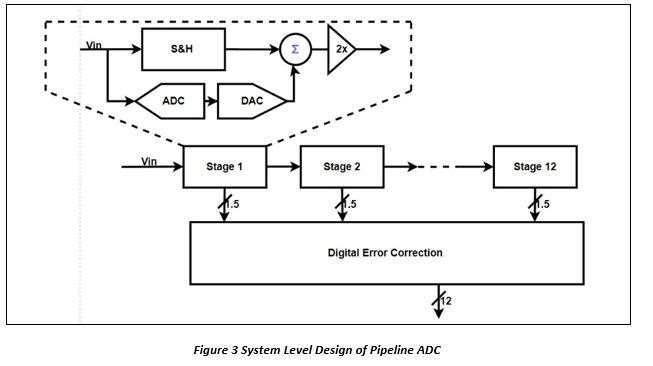

The pipelined analog-to-digital converter (ADC) has become the most popular ADC architecture for sampling rates from a few mega samples per second (Msps) up to 100Msps+. Pipelined A/D conversion has several advantages over more traditional flash converters. The main advantage is that pipeline converters have much lower power consumption because the number of comparators increases linearly with bit resolution. The proposed pipeline architecture has 12 stages as shown in Figure 3 [6]. Pipeline architecture because of its high tolerance of process variations, low power consumption, and smaller area makes them very attractive for system-level integration. Each pipelined stage generates a coarse ADC output and constructed residue signal for the later stages.


# **5.	Cadence Implementation**
The design was simulated in 130nm which is to be mapped onto the open-source tools Xschem, Magic. The fulfillment of targeted specifications will be made sure on the open-source tools as the next step of this project.

**5.1.     1.5 Bit Architecture**

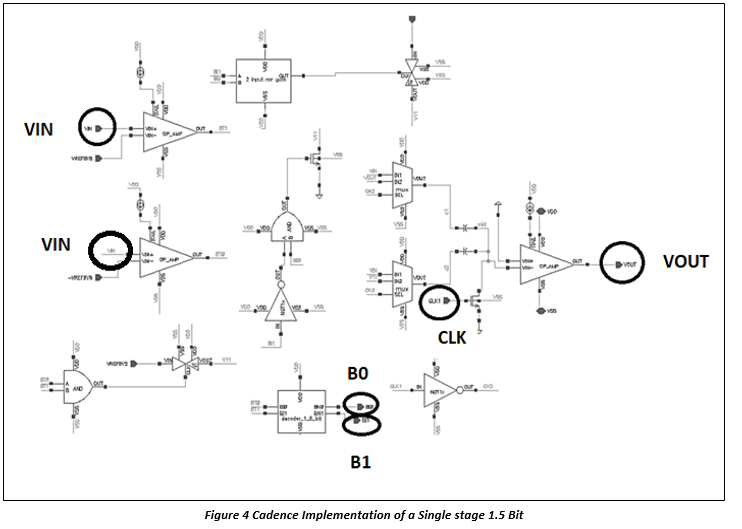


**Simulation Results**

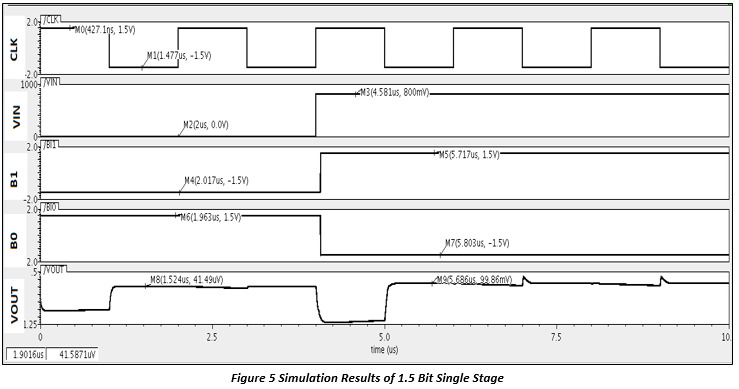

If we provided the input voltage is 0V then it means it lies between ±Vref/8 so 01 bits will be generated B1=0, B0=1, and residue voltage will be 2 times of input voltage so residue voltage will be 0V. And if we provided the input voltage is 800mV then it is greater than +Vref/8 so 10 bits will be generated B1=1, B0=0, and output voltage will be 2*(Vin-Vref/4) or (2Vin-Vref/2) so output will be 100mV.

**Results**

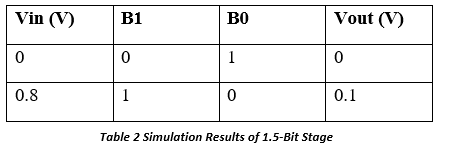

**5.2.	12 Bit Pipeline ADC with 1.5 Bit/Stage Architecture**

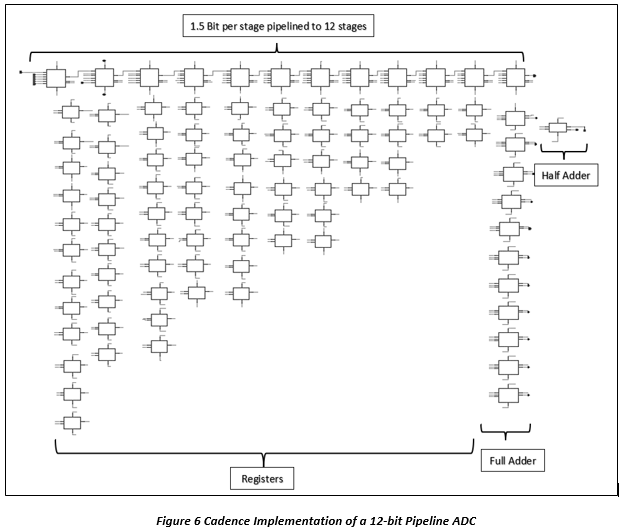

This is 12 bits ADC each stage is 1.5 bits. Each stage passes the residue voltage to the next stage. 

Each stage will generate two bits. By the end of 12 clock cycles, all the bits will be generated. In each stage, we used the registers for the delay so that 12 bits were generated at the output at the same time. Two clocks are used PH1 and PH2 after two-stage registers incremented by 1.

If we used only 1 clock then after each stage registers are incremented by 1 but if we used two clock phases then after two stages registers are incremented by 1. At 0 stage no register is used, at stages 1 and 2 one register is used at stages 3 and 4 two registers are used. At stage 12 six registers are used. In the end, we used 11 Full adders and one-half adder used for the final bits result.

**Simulation Results**
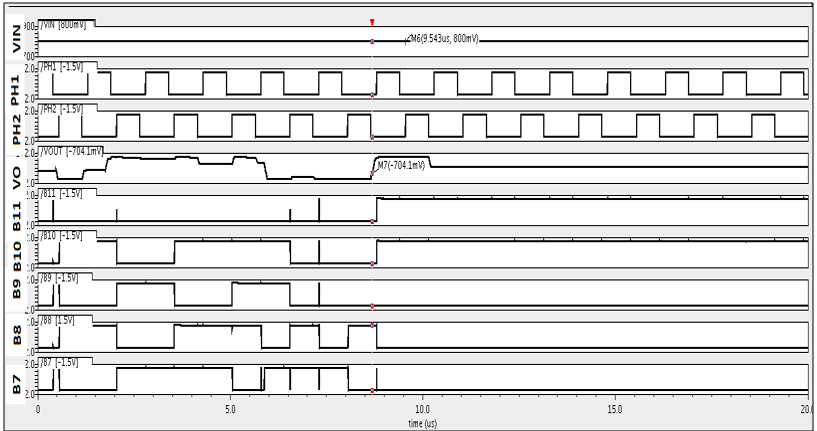
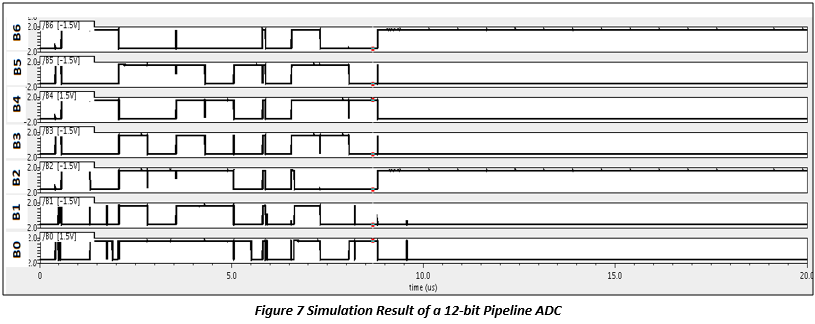

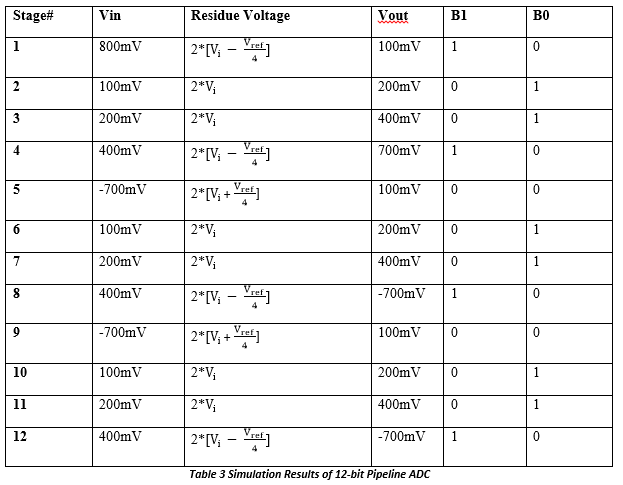

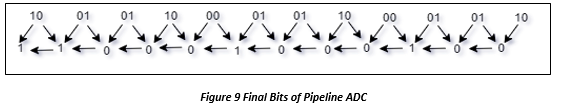


The output bits of each stage were fed to adders and the resultant output bits for an input voltage of Vin = 800mV came out to be Bout = 110001000100.





# **6.	Open Source Implementation**

The single stage 1.5 bit design is simulated in Skywater 130nm on open-source tools which is to be mapped onto the Global Foundry 180nm PDK.

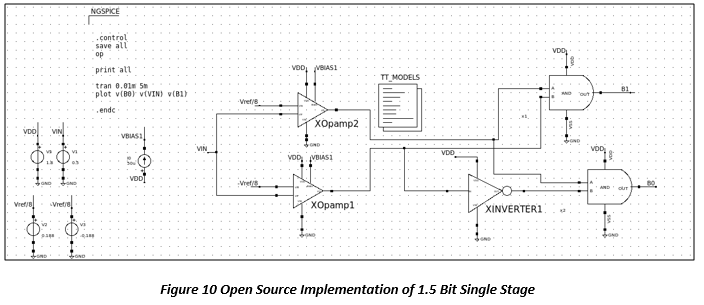

**Simulation Results**

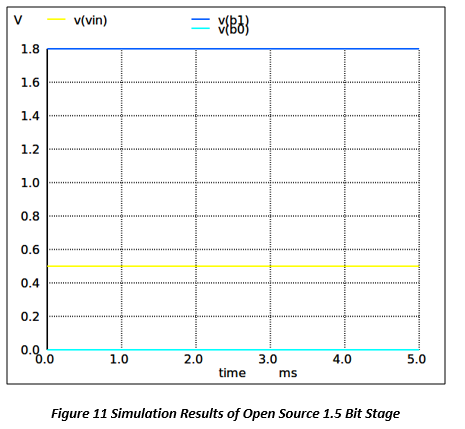

In this case, we applied an input voltage of 0.5V, which is greater than +Vref/8. Therefore, based on equation(3), the ADC should generate bits B1=1 and B0=0. And this prediction is consistent with the observed output waveform. The applied Vref is 1.5v 

# **7.	Extended to Differential Architecture**

A differential ADC measures the voltage difference between two inputs. This can be essential in certain applications as some measurement concepts require two output signals instead of one to quantify the physical property of interest. Sensors that implement such concepts typically provide their output value as the voltage difference between two signals, also known as a differential signal. As shown in Figure 7 each stage will have two sample and hold circuits along with 2x for differential inputs while sharing ADC & DAC between them. [8]

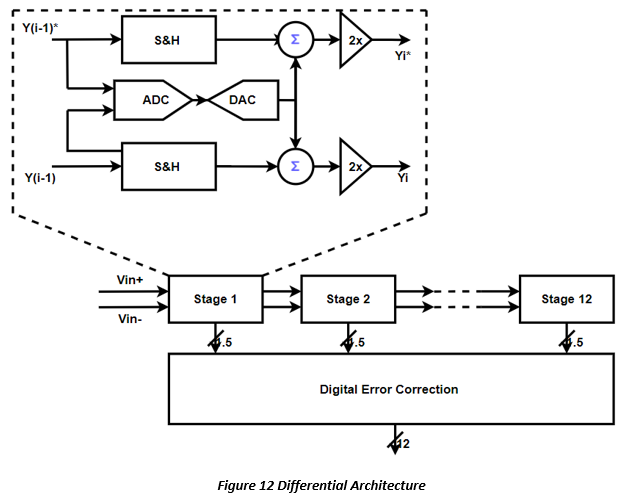


The primary advantage of differential ADCs is high common-mode noise immunity compared to single-ended ADCs. This noise immunity is due to the same noise being coupled on both the inverting and non-inverting input signals of the ADC and this noise is rejected by the common-mode rejection capabilities of the differential ADC.



# **8.	Conclusion**

The proposal entails the design and operational simulation of a 12-bit Pipeline ADC using the Cadence 130nm technology node and a single 1.5 bit stage using open source tools. The ADC incorporates a pseudo-differential architecture and a capacitor cross-coupled sample-and-hold stage, with targeted specifications that comprise a signal-to-noise and distortion ratio of 74.5 dB, a spurious free dynamic range of 88.5 dB, and an effective number of bits of 10.7 at full sampling rate. By delivering a low area and scalable power dissipation, the ADC IP block is highly versatile and can be employed in various SoC systems. The next step is to implement 12 bit pipeline architecture on open-source tools such as Xschem and Magic, GF MCU 180nm PDK, and verify that all requirements have been fulfilled.






# **References**
[1] 	D. T. Dumesso, "Cyclic ADC for Langmuir Probes," Department of Physics University of OSLO, OSLO, 2021.

[2] 	H. Zaho, "Pipeline ADC Design Methodology," UNIVERSITY OF CALIFORNIA, June 2012.

[3] 	M. K. Jyoti, "Different Analog to Digital Converters Architectures," International Journal of Innovative Technology and Exploring Engineering (IJITEE), vol. 9, no. 4, pp. 1256-1263, 2020. 

[4] 	A. C. Karen Anundson, "Pipeline ADC with a Nonlinear Gain Stage and Digital Correction," WORCESTER POLYTECHNIC INSTITUTE, March 2011.

[5] 	"Maxim Integrated," 2 Oct 2001. [Online]. Available: https://www.analog.com/media/en/technical-documentation/tech-articles/understanding-pipelined-adcs.pdf.

[6] 	G. M. Byung-Geun Lee, "A 14-b 100-MS/s Pipelined ADC With a Merged SHA and First MDAC," IEEE JOURNAL OF SOLID-STATE CIRCUITS, vol. 43, pp. 2613-2619, Dec 2008. 

[7] 	S. F. T. a. E. B. Yong-hi Park, "A low power 10 bit, 80 MS/s CMOS pipelined ADC at 1.8V power supply," in Data Converter Group, Texas Instruments Inc, Dallas, TX. 


[8] 	M. F. Daisuke Miyazaki, "A 10-b 30-MS/s Low-Power Pipelined CMOS A/D Converter Using a Pseudodifferential Architecture," IEEE JOURNAL OF SOLID-STATE CIRCUITS, vol. 38, pp. 369-373, 2003. 
